In [75]:
import numpy as np
import os,sys
import math
import matplotlib.pyplot as plt

In [76]:
exp_type = 'exp_sigma_phi_2'
data_path = os.path.join(os.getcwd(),os.pardir,'results',exp_type)

In [77]:
# [n_pi_ampls, num_simulation, n_methods]
z_est_arrays = np.load(os.path.join(data_path,'z_est_arrays.npy')) 
# [n_pi_ampls, num_simulation, n_methods, M]
phi_est_arrays = np.load(os.path.join(data_path,'phi_est_arrays.npy'))

In [78]:
n_pi_ampls, num_simulation, n_methods, M = phi_est_arrays.shape

In [79]:

# method: GOP, NET, MAP
z_est_GOP = z_est_arrays[:,:,0]
z_est_NET = z_est_arrays[:,:,1]
z_est_MAP = z_est_arrays[:,:,2]

phi_est_GOP = phi_est_arrays[:,:,0,:]
phi_est_NET = phi_est_arrays[:,:,1,:]
phi_est_MAP = phi_est_arrays[:,:,2,:]

In [80]:
print(z_est_GOP.shape)

(14, 60)


In [81]:
mean_z_est_GOP = np.mean(z_est_GOP, axis=1)
mean_z_est_NET = np.mean(z_est_NET, axis=1)
mean_z_est_MAP = np.mean(z_est_MAP, axis=1)

sem_z_est_GOP = np.std(z_est_GOP, axis=1)/np.sqrt(num_simulation)
sem_z_est_NET = np.std(z_est_NET, axis=1)/np.sqrt(num_simulation)
sem_z_est_MAP = np.std(z_est_MAP, axis=1)/np.sqrt(num_simulation)

mean_phi_est_GOP = np.mean(phi_est_GOP, axis=1)
mean_phi_est_NET = np.mean(phi_est_NET, axis=1)
mean_phi_est_MAP = np.mean(phi_est_MAP, axis=1)

sem_phi_est_GOP = np.std(phi_est_GOP, axis=1)/np.sqrt(num_simulation)
sem_phi_est_NET = np.std(phi_est_NET, axis=1)/np.sqrt(num_simulation)
sem_phi_est_MAP = np.std(phi_est_MAP, axis=1)/np.sqrt(num_simulation)

In [82]:
# coompute the square error
z_gt = 99.5
lambda_gs = np.array([3,7,10])
phi_gt = np.mod(z_gt/lambda_gs,1) * 2 * np.pi
print('phi_gt:',phi_gt, 'z_gt:',z_gt)

phi_gt: [1.04719755 1.34639685 5.96902604] z_gt: 99.5


In [83]:
# calculate the square error for z for each method
z_se_GOP = np.mean((z_est_GOP - z_gt)**2, axis=1)
z_se_NET = np.mean((z_est_NET - z_gt)**2, axis=1)
z_se_MAP = np.mean((z_est_MAP - z_gt)**2, axis=1)

# sqrt of the square error
z_rmse_GOP = np.sqrt(z_se_GOP)
z_rmse_NET = np.sqrt(z_se_NET)
z_rmse_MAP = np.sqrt(z_se_MAP)

In [84]:
# pi_ampls = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]) * 0.11
pi_ampls = np.array([0.5, 1.0, 1.5, 2.0, 2.4, 2.8, 3.4, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]) * 0.11

In [86]:
save_path = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_path):
    os.makedirs(save_path)

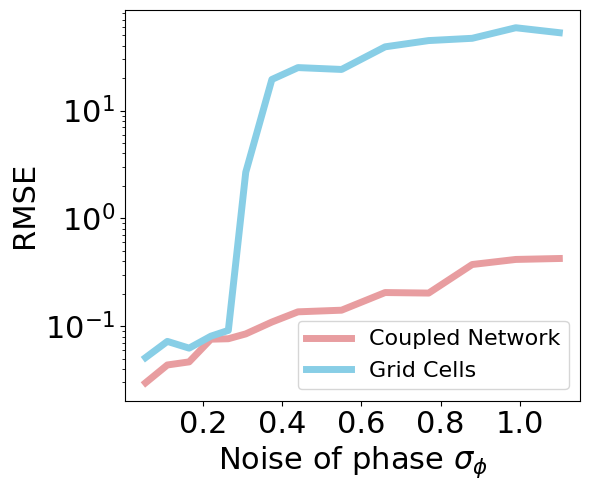

In [87]:
fontsize = 22
linewidth = 5.
figsize=(6, 5)
legend_fontsize = 16
# color = ['#F5E09B', '#9ec6db', '#B19CD9']
color = ['#E89DA0','#88CEE6','#B2D3A4']

plt.figure(figsize=figsize)
# plot the square error for z for each method
# plt.plot(pi_ampls,z_se_NET, label='NET', linewidth=linewidth, color=color[0])
# plt.plot(pi_ampls,z_se_MAP, label='MAP', linewidth=linewidth, color=color[1])
# plt.plot(pi_ampls,z_se_GOP, label='GOP', linewidth=linewidth, color=color[2])
# plot the sqrt of the square error for z for each method
plt.plot(pi_ampls,z_rmse_NET, label='Coupled Network', linewidth=linewidth, color=color[0])
plt.plot(pi_ampls,z_rmse_MAP, label='Grid Cells', linewidth=linewidth, color=color[1])
# plt.plot(pi_ampls,z_rmse_GOP, label='GOP', linewidth=linewidth, color=color[2])
# log scale for y axis
plt.yscale('log')
plt.xlabel('Noise of phase $\sigma_{\phi}$', fontsize=fontsize)
plt.ylabel('RMSE', fontsize=fontsize)
plt.legend(fontsize=legend_fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()
plt.savefig(os.path.join(save_path,'vary_sigma_phi.png'))
plt.show()